# Showing statistically how data behaves from Survey and Real Time (Google maps)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
import datetime

# Survey's Traffic Data Stats

To show statistics a subdataframe containing only car trips is created, having both source and destination values

In [2]:

%store -r CDMX_Destinations

CDMX_dist_norm = CDMX_Destinations.copy()

In [3]:
CDMX_dist_norm.shape

(44399, 67)

In [4]:
#Cleaning CDMX_dist_norm by deleting rows not having source ['municipio_origen'] or destination ['municipio_destino']
not_sour_dest = CDMX_dist_norm[(CDMX_dist_norm['municipio_origen'].isnull()) | 
                             CDMX_dist_norm['municipio_destino'].isnull() ]

#Reassigning new DataFrame valu to CDMX_dist_norm
CDMX_dist_norm = pd.concat([CDMX_dist_norm, not_sour_dest]).drop_duplicates(keep=False).copy()




In [5]:
CDMX_dist_norm = CDMX_dist_norm.loc[CDMX_dist_norm['¿Auto?']== 'Utilizó']

In [6]:
# Demonstrate calculating measures of central tendency
trip_duration = CDMX_dist_norm['Minutos transcurridos']

## Normal distribution

1077
Mean Trip duration is 55.30378689437535
Median Trip duration is 50.0
ModeResult(mode=array([60.]), count=array([2041]))


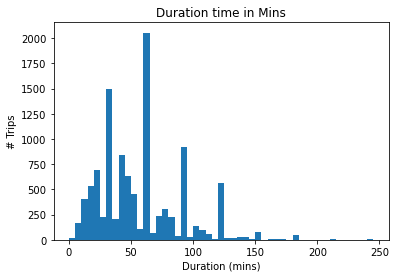

NormaltestResult(statistic=190.71822412446107, pvalue=3.85535019062809e-42)


In [7]:
sample_num = int(trip_duration.count()*.1)
print(sample_num)

mean_numpy = np.mean(trip_duration)
print(f"Mean Trip duration is {mean_numpy}")

median_numpy = np.median(trip_duration)
print(f"Median Trip duration is {median_numpy}")

print(sts.mode(trip_duration))


# Characterize the data set using matplotlib and stats.normaltest

plt.hist(trip_duration, bins=np.arange(0,250,5))
plt.title ("Duration time in Mins")
plt.ylabel("# Trips")
plt.xlabel("Duration (mins)")
plt.show()

print(sts.normaltest(trip_duration.sample(sample_num)))


In [8]:
# Demonstrate calculating the variance and standard deviation using the different modules
var_numpy = np.var(trip_duration,ddof = 0)
print(f"Variance is {var_numpy}")

sd_numpy = np.std(trip_duration,ddof = 0)
print(f"Standard deviation using the NumPy module is {sd_numpy}")

Variance is 2526.2837112951556
Standard deviation using the NumPy module is 50.26214988731735


## Showing Outliers

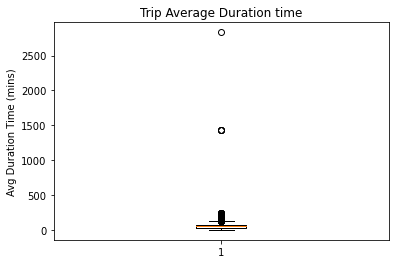

In [9]:
# Calculate the 68-95-99.7 rule using the standard deviation
fig1, ax1 = plt.subplots()
ax1.set_title('Trip Average Duration time')
ax1.set_ylabel('Avg Duration Time (mins)')
ax1.boxplot(trip_duration)
plt.show()

## Getting Quartiles
As per boxplot chart, we notice there are outliers. We set our quartiles, to determine which are the outliers and possible reasons for that:

In [10]:
quartiles = trip_duration.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of trip duration is: {lowerq}")
print(f"The upper quartile of trip duration is: {upperq}")
print(f"The interquartile range of trip duration is: {iqr}")


lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of trip duration is: 30.0
The upper quartile of trip duration is: 70.0
The interquartile range of trip duration is: 40.0
Values below -30.0 could be outliers.
Values above 130.0 could be outliers.


There are only upper outliers above 130 (a negative time number is not valid in our world!) 

Getting DataFrame records with Trip Duration time ('Minutos transcurridos') > 130

In [11]:
CDMX_outliers = CDMX_dist_norm.loc[(CDMX_dist_norm['Minutos transcurridos']>upper_bound) | 
                                   (CDMX_dist_norm['Minutos transcurridos']<lower_bound)]

In [12]:
CDMX_outliers.sort_values('Minutos transcurridos', ascending=False)

,id_via,id_soc,clasif_viaje,lugar_origen,municipio_origen,estado_origen,colonia_origen,tipo_lugar_destino_,municipio_destino,estado_destino,...,estrato,factor,upm_dis,est_dis,tloc,sexo,edad,Minutos transcurridos,Star time,End time
199977,197686,67568,Viaje realizado entre semana (Sección V),Bases o estaciones de transporte público,Benito Juárez,Ciudad de México,Portales,Bases o estaciones de transporte público,Gustavo A. Madero,Ciudad de México,...,Medio alto,112,4498,1970,"Localidades mayores de 100,000 habitantes",Hombre,41,2835.0,0 days 23:50:00,0 days 00:35:00
105799,103673,35477,Viaje realizado entre semana (Sección V),Escuela,Benito Juárez,Ciudad de México,Reforma Iztaccihuatl,Oficina,Álvaro Obregón,Ciudad de México,...,Medio alto,104,2463,1010,"Localidades mayores de 100,000 habitantes",Mujer,41,1440.0,4 days 04:39:00,4 days 04:39:00
105718,103592,35451,Viaje realizado entre semana (Sección V),Su hogar,Iztapalapa,Ciudad de México,Escuadrón 201,Oficina,Azcapotzalco,Ciudad de México,...,Medio alto,94,2462,1010,"Localidades mayores de 100,000 habitantes",Mujer,35,1440.0,4 days 04:39:00,4 days 04:39:00
396244,397967,147275,Viaje realizado entre semana (Sección V),Su hogar,Ecatepec de Morelos,México,Multiplaza Aragón-Cd Azteca,Oficina,Cuauhtémoc,Ciudad de México,...,Alto,103,9272,4110,"Localidades mayores de 100,000 habitantes",Hombre,45,1440.0,4 days 04:39:00,4 days 04:39:00
84015,83049,28275,Viaje realizado entre semana (Sección V),Su hogar,Gustavo A. Madero,Ciudad de México,Bondojito,Oficina,Cuajimalpa de Morelos,Ciudad de México,...,Medio alto,101,2001,830,"Localidades mayores de 100,000 habitantes",Hombre,47,1440.0,4 days 04:39:00,4 days 04:39:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338173,334687,122230,Viaje realizado entre semana (Sección V),Su hogar,Tultitlán,México,Central de Abastos Tultitlán-Santiago Teyahualco,Escuela,Miguel Hidalgo,Ciudad de México,...,Alto,80,7763,3470,"Localidades mayores de 100,000 habitantes",Hombre,28,135.0,0 days 06:30:00,0 days 08:45:00
139759,137442,46561,Viaje realizado entre semana (Sección V),Su hogar,La Magdalena Contreras,Ciudad de México,Olivar de los Padres-San Jerónimo,Oficina,Benito Juárez,Ciudad de México,...,Alto,118,3225,1350,"Localidades mayores de 100,000 habitantes",Hombre,56,135.0,0 days 06:45:00,0 days 09:00:00
352575,353864,130018,Viaje realizado entre semana (Sección V),Su hogar,Tultitlán,México,Pueblo San Pablo de las Salinas,Oficina,Álvaro Obregón,Ciudad de México,...,Alto,146,8240,3720,"Localidades mayores de 100,000 habitantes",Mujer,42,135.0,0 days 05:30:00,0 days 07:45:00
391605,387720,143910,Viaje realizado entre semana (Sección V),Su hogar,Ecatepec de Morelos,México,Héroes de la Independencia-San Agustin,Oficina,Miguel Hidalgo,Ciudad de México,...,Medio bajo,102,9062,4010,"Localidades mayores de 100,000 habitantes",Hombre,42,135.0,0 days 05:30:00,0 days 07:45:00


# Real Traffic Time Data

In [28]:
#Reading real time information.
directory = '../input_files/'
real_time_traffic_df = pd.read_csv(directory+'df_timepoints.csv')


## Cleaning Process

In [29]:
real_time_traffic_df.index

RangeIndex(start=0, stop=216, step=1)

In [30]:
#Cleans Timestamp only if there's an error thrown when trying to format Timestamp field
def clean_real_traffic(df):
    
    #Starting and ending points of substrings to remove to make field a Timestamp value
    start_i = len('0   ')
    #stop_i = df['Timestamp'].str.find('\ndtype:')[0]
    stop_i = df['Timestamp'].str.find('\ndtype:')[0]
    
    print(f'start {start_i}')
    print(f'stop {stop_i}')
    
    #If start_i or stop_i found, the timestamp field needs cleansing
    if((start_i>-1) | (stop_i >-1)):
        #If an error, then field dtype is a string, removing all garbage starting on '\ndtype:' to set field to a 
        #timestamp type
      
       # Once 'Timestamp' field is formatted to datetime, it is converted using to_datetime method
        df['Timestamp']= pd.to_datetime(df['Timestamp'].str.slice(start=start_i,stop=stop_i))
        #Adding short format
        df['Time'] =  df['Timestamp'].dt.strftime("%H:%M")
    
    #Setting Real Traffic time to mins
    df['Route Traffic Time'] =  df['Route Traffic Time']/60
    return df


In [31]:
#Only calling this function if dataframe is not coming clean
clean_real_traffic_df = clean_real_traffic(real_time_traffic_df)
clean_real_traffic_df

start 4
stop 30


,Unnamed: 0,Starting Point Address,End Point Address,Route Distance,Nominal Time,Route Traffic Time,Timestamp,Time
0,0,"['Santa Martha Acatitla, Ciudad de México, CDM...","['Historic center of Mexico City, Centro, Mexi...",18424,2097,30.133333,2020-11-02 22:50:46.180789,22:50
1,1,"['Av. San Rafael Atlixco 186, Leyes de Reforma...","['Lomas de Chapultepec, 11000 Mexico City, CDM...",23296,2577,34.516667,2020-11-02 22:50:47.725199,22:50
2,2,"['Lomas Estrella, Ciudad de México, CDMX, Mexi...","['Del Valle, Mexico City, CDMX, Mexico']",16010,2304,29.216667,2020-11-02 22:50:49.210927,22:50
3,3,"['Bondojito, Ciudad de México, CDMX, Mexico']","['Historic center of Mexico City, Centro, Mexi...",7520,1253,15.900000,2020-11-02 22:50:50.335152,22:50
4,4,"['Bondojito, Ciudad de México, CDMX, Mexico']","['Lomas de Chapultepec, 11000 Mexico City, CDM...",16456,1813,23.750000,2020-11-02 22:50:51.284132,22:50
...,...,...,...,...,...,...,...,...
211,166,"['Bondojito, Ciudad de México, CDMX, Mexico']","['Lomas de Chapultepec, 11000 Mexico City, CDM...",14885,2178,43.750000,2020-11-03 08:20:18.740687,08:20
212,167,"['Villa Gustavo A. Madero, Mexico City, CDMX, ...","['Colonia Nápoles, Mexico City, CDMX, Mexico']",16206,2043,42.733333,2020-11-03 08:20:19.591927,08:20
213,168,"['Av. Carlos Hank González 50, Valle de Anahua...","['Historic center of Mexico City, Centro, Mexi...",17937,1840,38.916667,2020-11-03 08:20:20.308493,08:20
214,169,"['Av. Carlos Hank González 50, Valle de Anahua...","['Lomas de Chapultepec, 11000 Mexico City, CDM...",32487,2626,60.566667,2020-11-03 08:20:21.553347,08:20


## How Depart Time affects Trip Duration in the same route

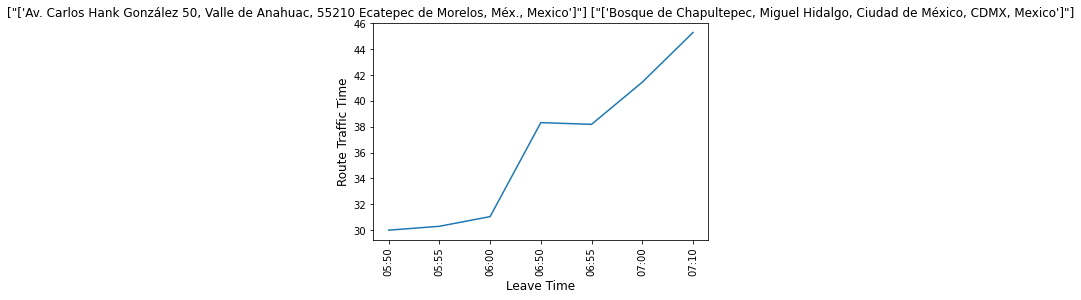

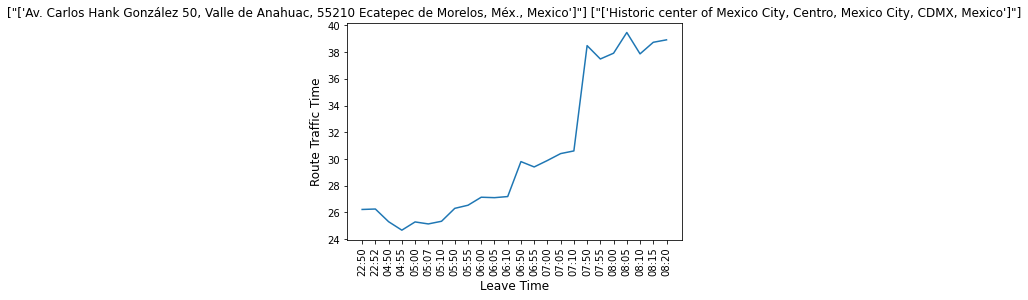

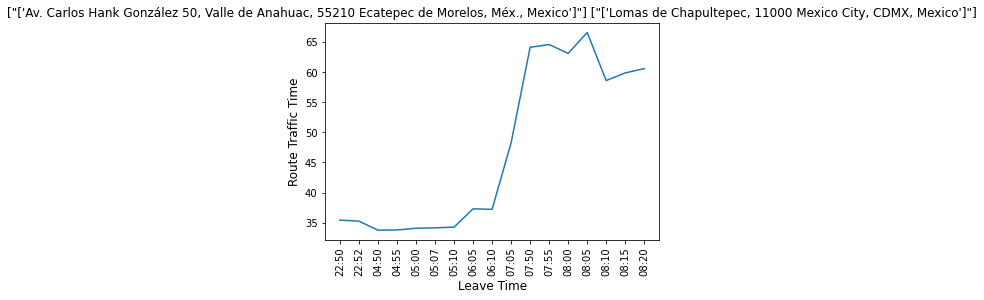

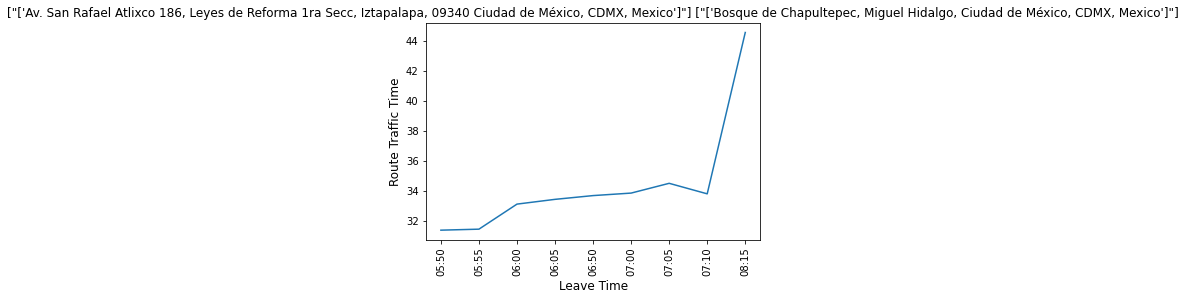

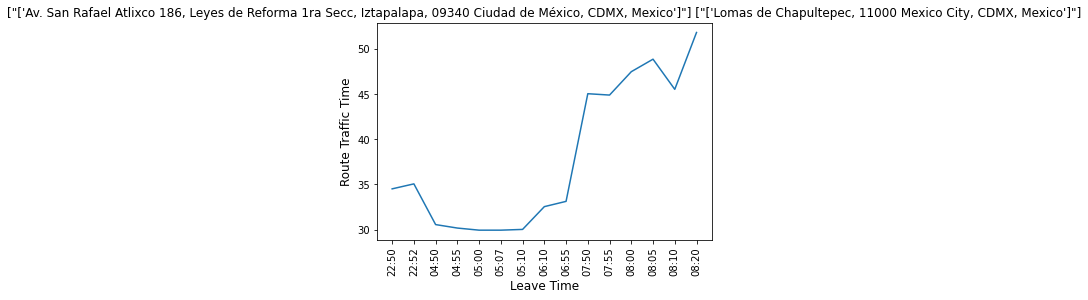

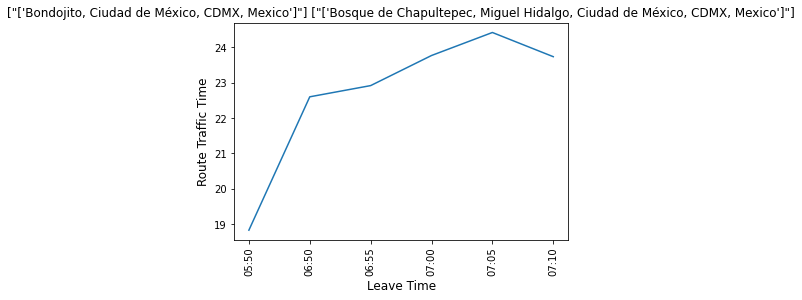

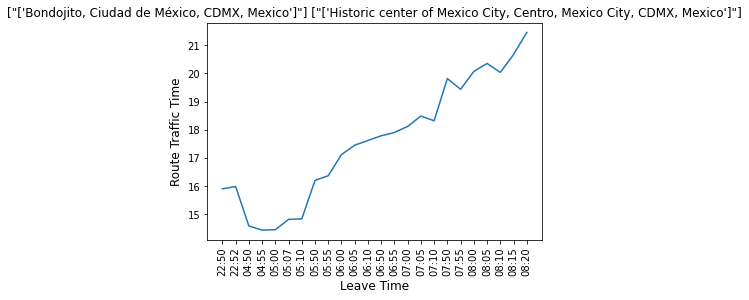

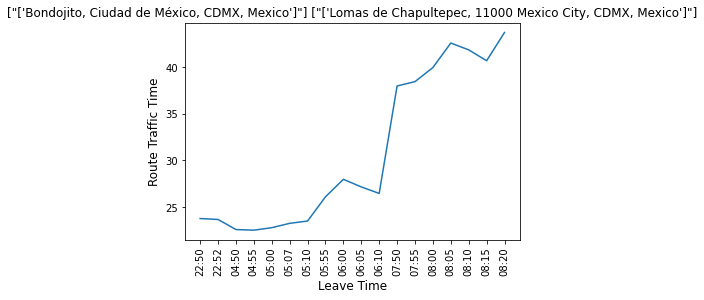

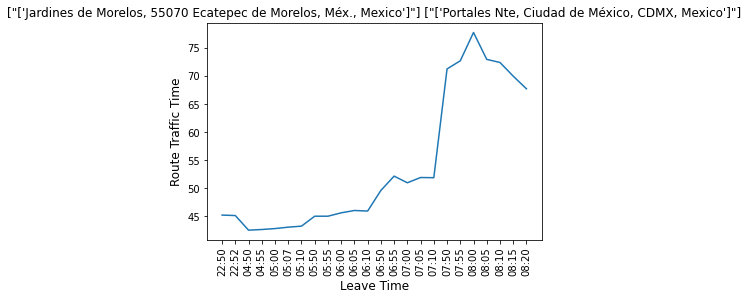

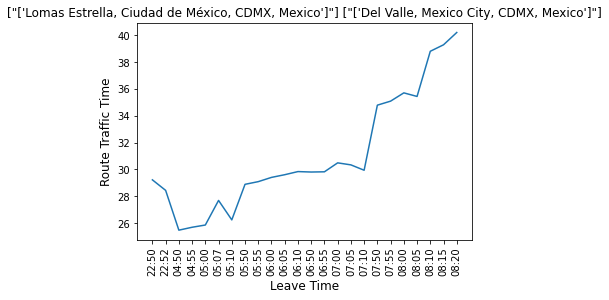

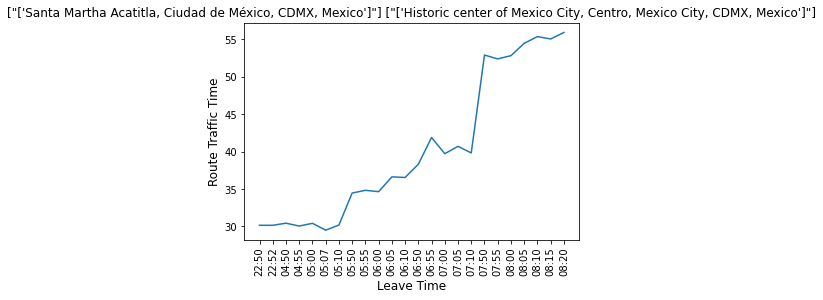

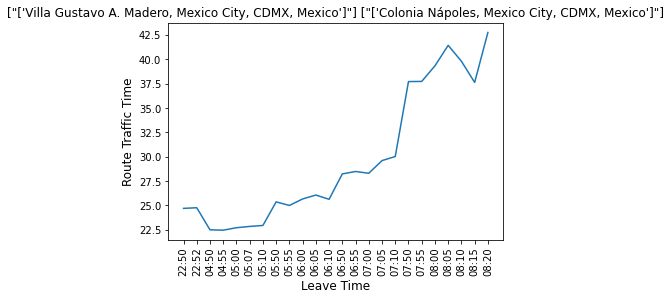

In [34]:
#Grouping by Starting Point and End Point addresses to set unique routes 
routes_gb = clean_real_traffic_df.groupby(['Starting Point Address', 'End Point Address' ])

#Iterating on each resulting DataFrame from GroupBy operation
for route in routes_gb.indices:
    route_df = routes_gb.get_group(route)
    title = f"{route_df['Starting Point Address'].unique()} {route_df['End Point Address'].unique()}"
    #print(title)
    x = route_df['Time']
    y = route_df['Route Traffic Time']
        
#Printing a chart for each route
    plt.plot(x, y)
    plt.title(title)
    plt.xlabel('Leave Time', fontsize='large')
    plt.ylabel('Route Traffic Time', fontsize='large')
    plt.xticks(rotation=90)
    plt.show()
    #route_df.plot(x='Time', y='Route Traffic Time', title=title, xlabel='Time', ylabel='Route Mins')

In [33]:
routes_gb